In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [2]:
SDB = sqlite3.connect('../../DATA/WEBscr.db')
C = SDB.cursor()
sql="""select * from TUrl;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)
df = df_with_dubs.drop_duplicates()
SDB.close()

df.head()

,id,url,name,params
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...
3,26331698,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...
4,25604691,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...


In [3]:
df.columns

Index(['id', 'url', 'name', 'params'], dtype='object')

In [4]:
def get_miestas(x):
    miestas = x.split(';')[-2]
    return miestas

df['miestas'] = df['params'].apply(get_miestas)

df.head()

,id,url,name,params,miestas
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,Utena
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,Jurbarkas
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,Kėdainiai
3,26331698,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,Vilnius
4,25604691,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,Kaunas


In [8]:
def get_kaina(x):
    kaina = x.split(';')[-1].split('\n')[0].replace(' ', '').replace('€', '')
    return int(kaina)

df['kaina'] = df['params'].apply(get_kaina)

df.head()

,id,url,name,params,miestas,kaina
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,Utena,1750
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,Jurbarkas,3900
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,Kėdainiai,6800
3,26331698,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,Vilnius,60500
4,25604691,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,Kaunas,18900


In [9]:
df.columns

Index(['id', 'url', 'name', 'params', 'miestas', 'kaina'], dtype='object')

In [10]:
atl = pd.read_csv('../../DATA/atlyginimai.csv', sep=',')
atl.head()

,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1
0,Šalies ūkis,"2 000,1","12,3","1 241,2","11,2"
1,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7"
2,Alytaus m. sav.,"1 685,4","10,5","1 073,7","9,9"
3,Alytaus r. sav.,"1 528,5","8,6","991,9","8,6"
4,Anykščių r. sav.,"1 537,7","11,5","996,7","10,9"


In [11]:
def get_trump(x):
    return x[:4]

atl['mst'] = atl['Sav.'].apply(get_trump)

atl.head()

,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,mst
0,Šalies ūkis,"2 000,1","12,3","1 241,2","11,2",Šali
1,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme
2,Alytaus m. sav.,"1 685,4","10,5","1 073,7","9,9",Alyt
3,Alytaus r. sav.,"1 528,5","8,6","991,9","8,6",Alyt
4,Anykščių r. sav.,"1 537,7","11,5","996,7","10,9",Anyk


In [12]:
# Drop duplicate values in the 'name' column, keeping the first occurrence
atl_u = atl.drop_duplicates(subset='mst', keep='first')
atl_u.head()

,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,mst
0,Šalies ūkis,"2 000,1","12,3","1 241,2","11,2",Šali
1,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme
2,Alytaus m. sav.,"1 685,4","10,5","1 073,7","9,9",Alyt
4,Anykščių r. sav.,"1 537,7","11,5","996,7","10,9",Anyk
5,Birštono sav.,"1 645,0","16,2","1 052,6","14,7",Birš


In [13]:
df['mst'] = df['miestas'].apply(get_trump)
df.head()

,id,url,name,params,miestas,kaina,mst
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,Utena,1750,Uten
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,Jurbarkas,3900,Jurb
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,Kėdainiai,6800,Kėda
3,26331698,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,Vilnius,60500,Viln
4,25604691,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,Kaunas,18900,Kaun


In [14]:
m_df = pd.merge(atl_u, df, how='inner', on='mst')
m_df.head()

,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,mst,id,url,name,params,miestas,kaina
0,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26875211,https://autoplius.lt/skelbimai/audi-a6-3-0-l-u...,Audi,Audi A6;2008-11;Universalas;Dyzelinas;Automati...,Akmenė,3600
1,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26505064,https://autoplius.lt/skelbimai/audi-a6-2-4-l-u...,Audi,Audi A6;2005-05;Universalas;Benzinas;Mechaninė...,Akmenė,2200
2,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26361070,https://autoplius.lt/skelbimai/audi-a3-2-0-l-h...,Audi,Audi A3;2008-08;Hečbekas;Dyzelinas;Mechaninė;2...,Akmenė,4800
3,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26869291,https://autoplius.lt/skelbimai/bmw-320-2-0-l-k...,BMW,BMW 320;2007-07;Kupė (Coupe);Dyzelinas;Automat...,Akmenė,7200
4,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26795349,https://autoplius.lt/skelbimai/bmw-x5-3-0-l-vi...,BMW,BMW X5;2007;Visureigis / Krosoveris;Dyzelinas;...,Akmenė,10200


In [16]:
m_df.columns

Index(['Sav.', 'Bruto, EUR', 'Pokytis proc. per metus', 'Neto, EUR',
       'Pokytis proc. per metus.1', 'mst', 'id', 'url', 'name', 'params',
       'miestas', 'kaina'],
      dtype='object')

In [28]:
def get_bruto(x):
    bruto = float(x.replace('\xa0', '').replace(',', '.'))
    return bruto

m_df['bruto'] = m_df['Bruto, EUR'].apply(get_bruto)
m_df.head()


,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,mst,id,url,name,params,miestas,kaina,bruto
0,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26875211,https://autoplius.lt/skelbimai/audi-a6-3-0-l-u...,Audi,Audi A6;2008-11;Universalas;Dyzelinas;Automati...,Akmenė,3600,1758.8
1,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26505064,https://autoplius.lt/skelbimai/audi-a6-2-4-l-u...,Audi,Audi A6;2005-05;Universalas;Benzinas;Mechaninė...,Akmenė,2200,1758.8
2,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26361070,https://autoplius.lt/skelbimai/audi-a3-2-0-l-h...,Audi,Audi A3;2008-08;Hečbekas;Dyzelinas;Mechaninė;2...,Akmenė,4800,1758.8
3,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26869291,https://autoplius.lt/skelbimai/bmw-320-2-0-l-k...,BMW,BMW 320;2007-07;Kupė (Coupe);Dyzelinas;Automat...,Akmenė,7200,1758.8
4,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26795349,https://autoplius.lt/skelbimai/bmw-x5-3-0-l-vi...,BMW,BMW X5;2007;Visureigis / Krosoveris;Dyzelinas;...,Akmenė,10200,1758.8


In [32]:
gr_df = m_df.groupby('miestas')[['bruto', 'kaina']].mean()

gr_df.head()

,bruto,kaina
miestas,,
Akmenė,1758.8,5888.727273
Alytus,1685.4,8496.860465
Anykščiai,1537.7,6678.653333
Birštonas,1645.0,11676.515152
Biržai,1500.9,5320.931373


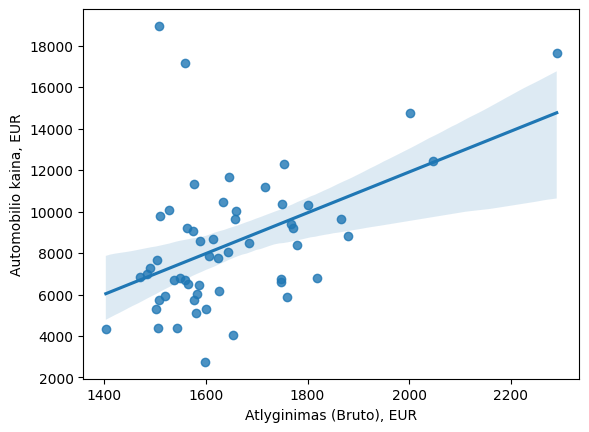

In [41]:
fig, axis = plt.subplots()

sns.regplot(data=gr_df, x='bruto', y='kaina', order=1)
axis.set_xlabel('Atlyginimas (Bruto), EUR')
axis.set_ylabel('Automobilio kaina, EUR')

plt.show()

In [43]:
#Ar tokia pat priklausomybė egzistuoja atsižvelgiant į automobilių gamintoją (Imti top 5 autogamintojus),
# kuro rūšį, kėbulo tipą, pasinaudokite seaborn lmplot(). 
#X ašyje vietoj vidutinių atlyginimų pabndykite atvaizduoti Miestų pavadinimus,
# iš kurių paimti vidutiniai atlyginimai.

def get_kuras(x):
    kuras = x.split(';')[3]
    return kuras

def get_kebulas(x):
    kebulas = x.split(';')[2]
    return kebulas
    
m_df['kuras'] = m_df['params'].apply(get_kuras)
m_df['kebulas'] = m_df['params'].apply(get_kebulas)

m_df.head()


,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,mst,id,url,name,params,miestas,kaina,bruto,kuras,kebulas
0,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26875211,https://autoplius.lt/skelbimai/audi-a6-3-0-l-u...,Audi,Audi A6;2008-11;Universalas;Dyzelinas;Automati...,Akmenė,3600,1758.8,Dyzelinas,Universalas
1,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26505064,https://autoplius.lt/skelbimai/audi-a6-2-4-l-u...,Audi,Audi A6;2005-05;Universalas;Benzinas;Mechaninė...,Akmenė,2200,1758.8,Benzinas,Universalas
2,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26361070,https://autoplius.lt/skelbimai/audi-a3-2-0-l-h...,Audi,Audi A3;2008-08;Hečbekas;Dyzelinas;Mechaninė;2...,Akmenė,4800,1758.8,Dyzelinas,Hečbekas
3,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26869291,https://autoplius.lt/skelbimai/bmw-320-2-0-l-k...,BMW,BMW 320;2007-07;Kupė (Coupe);Dyzelinas;Automat...,Akmenė,7200,1758.8,Dyzelinas,Kupė (Coupe)
4,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26795349,https://autoplius.lt/skelbimai/bmw-x5-3-0-l-vi...,BMW,BMW X5;2007;Visureigis / Krosoveris;Dyzelinas;...,Akmenė,10200,1758.8,Dyzelinas,Visureigis / Krosoveris


In [44]:
top5 = m_df['name'].value_counts().head(5).index.to_list()
print(top5)

['Volkswagen', 'BMW', 'Audi', 'Mercedes-Benz', 'Toyota']


In [45]:
top_df = m_df[m_df['name'].isin(top5)]
top_df.head()

,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,mst,id,url,name,params,miestas,kaina,bruto,kuras,kebulas
0,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26875211,https://autoplius.lt/skelbimai/audi-a6-3-0-l-u...,Audi,Audi A6;2008-11;Universalas;Dyzelinas;Automati...,Akmenė,3600,1758.8,Dyzelinas,Universalas
1,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26505064,https://autoplius.lt/skelbimai/audi-a6-2-4-l-u...,Audi,Audi A6;2005-05;Universalas;Benzinas;Mechaninė...,Akmenė,2200,1758.8,Benzinas,Universalas
2,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26361070,https://autoplius.lt/skelbimai/audi-a3-2-0-l-h...,Audi,Audi A3;2008-08;Hečbekas;Dyzelinas;Mechaninė;2...,Akmenė,4800,1758.8,Dyzelinas,Hečbekas
3,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26869291,https://autoplius.lt/skelbimai/bmw-320-2-0-l-k...,BMW,BMW 320;2007-07;Kupė (Coupe);Dyzelinas;Automat...,Akmenė,7200,1758.8,Dyzelinas,Kupė (Coupe)
4,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26795349,https://autoplius.lt/skelbimai/bmw-x5-3-0-l-vi...,BMW,BMW X5;2007;Visureigis / Krosoveris;Dyzelinas;...,Akmenė,10200,1758.8,Dyzelinas,Visureigis / Krosoveris


In [51]:
gr_top_miestas = top_df.groupby(['miestas', 'name'])[['bruto', 'kaina']].mean().reset_index()
gr_top_miestas

,miestas,name,bruto,kaina
0,Akmenė,Audi,1758.8,3533.333333
1,Akmenė,BMW,1758.8,6466.666667
2,Akmenė,Mercedes-Benz,1758.8,6125.000000
3,Akmenė,Volkswagen,1758.8,3420.000000
4,Alytus,Audi,1685.4,9538.783784
...,...,...,...,...
249,Švenčionys,Audi,1506.9,5833.333333
250,Švenčionys,BMW,1506.9,5633.333333
251,Švenčionys,Mercedes-Benz,1506.9,4500.000000
252,Švenčionys,Toyota,1506.9,2475.000000


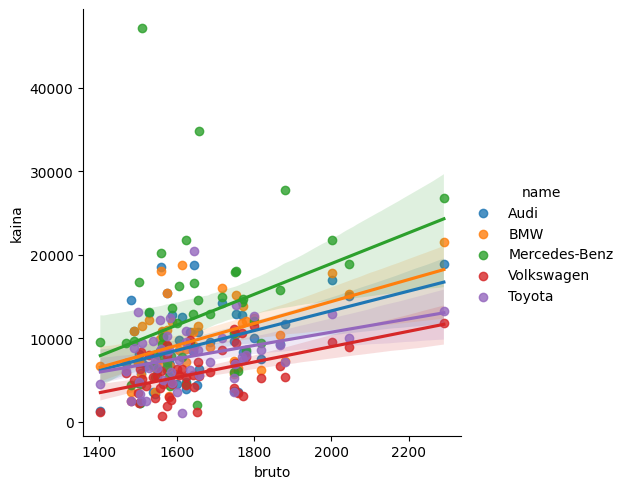

In [53]:
# fig, axis = plt.subplots()

sns.lmplot(data=gr_top_miestas, x='bruto', y='kaina', hue='name', order=1)
# axis.set_xlabel('Atlyginimas (Bruto), EUR')
# axis.set_ylabel('Automobilio kaina, EUR')

# plt.show()

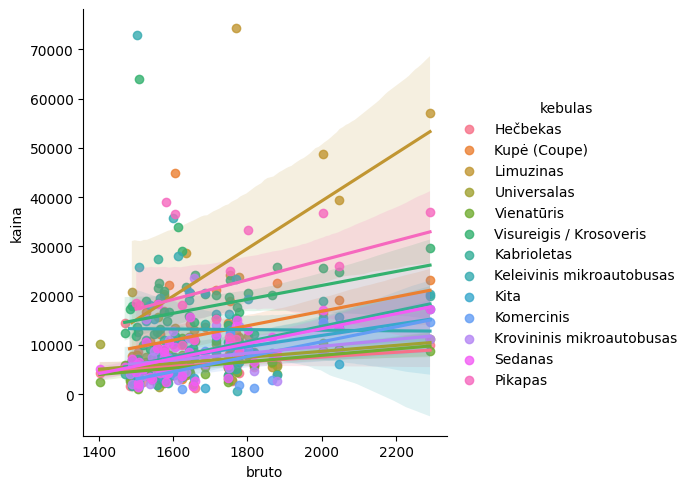

In [55]:
gr_top_kebulas = top_df.groupby(['miestas', 'kebulas'])[['bruto', 'kaina']].mean().reset_index()
sns.lmplot(data=gr_top_kebulas, x='bruto', y='kaina', hue='kebulas', order=1)


In [ ]:
def kuras1(x):
    if 'Elektra,' in x:
        return 'Elektra'
    elif 'Benzinas / elektra' in x:
        return 'Benzinas / elektra'
    else:
        return x
    
top_df['kuras1'] = top_df['kuras'].apply(kuras1)
top_df.head()

,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,mst,id,url,name,params,miestas,kaina,bruto,kuras,kebulas,kuras1
0,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26875211,https://autoplius.lt/skelbimai/audi-a6-3-0-l-u...,Audi,Audi A6;2008-11;Universalas;Dyzelinas;Automati...,Akmenė,3600,1758.8,Dyzelinas,Universalas,Dyzelinas
1,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26505064,https://autoplius.lt/skelbimai/audi-a6-2-4-l-u...,Audi,Audi A6;2005-05;Universalas;Benzinas;Mechaninė...,Akmenė,2200,1758.8,Benzinas,Universalas,Benzinas
2,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26361070,https://autoplius.lt/skelbimai/audi-a3-2-0-l-h...,Audi,Audi A3;2008-08;Hečbekas;Dyzelinas;Mechaninė;2...,Akmenė,4800,1758.8,Dyzelinas,Hečbekas,Dyzelinas
3,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26869291,https://autoplius.lt/skelbimai/bmw-320-2-0-l-k...,BMW,BMW 320;2007-07;Kupė (Coupe);Dyzelinas;Automat...,Akmenė,7200,1758.8,Dyzelinas,Kupė (Coupe),Dyzelinas
4,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme,26795349,https://autoplius.lt/skelbimai/bmw-x5-3-0-l-vi...,BMW,BMW X5;2007;Visureigis / Krosoveris;Dyzelinas;...,Akmenė,10200,1758.8,Dyzelinas,Visureigis / Krosoveris,Dyzelinas


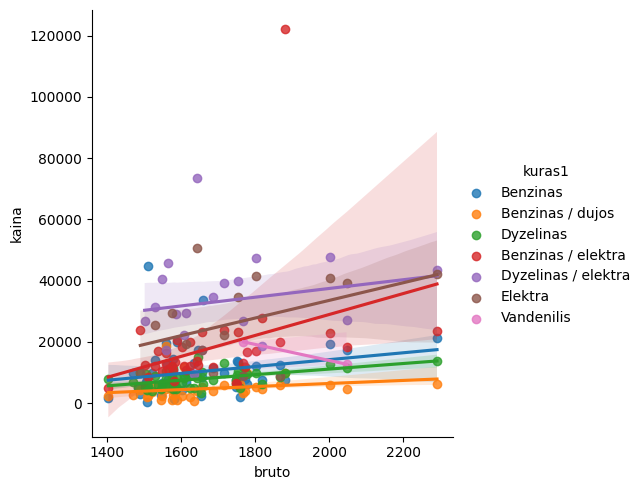

In [73]:
# gr_top_kuras = top_df[(top_df['kuras1'] != 'Vandenilis') | (top_df['kuras1'] != 'Kita')].groupby(['miestas', 'kuras1'])[['bruto', 'kaina']].mean().reset_index()
gr_top_kuras = top_df[(top_df['kuras1'] != 'Kita')].groupby(['miestas', 'kuras1'])[['bruto', 'kaina']].mean().reset_index()
# gr_top_kuras = top_df.groupby(['miestas', 'kuras1'])[['bruto', 'kaina']].mean().reset_index()
# gr_top_kuras
sns.lmplot(data=gr_top_kuras, x='bruto', y='kaina', hue='kuras1', order=1)